In [1]:
#importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
#create a set of random latitudes and longitudes
lats=np.random.uniform(-90.000,90.000,size=1500)
lngs=np.random.uniform(-180.000,180.000,size=1500)
lat_lngs=zip(lats,lngs)
lat_lngs

In [3]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [4]:
for coordinate in coordinates:
    print(coordinate[0],coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
#add the latitudes and longitudes into a list
coordinates = list(lat_lngs)

In [6]:
#use the citypy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

albany au
ambulu id
mar del plata ar
kodiak us
hilo us
mar del plata ar
napasar in
codrington ag
kodiak us
qaanaaq gl
mar del plata ar
east london za
taolanaro mg
atuona pf
homer us
ushuaia ar
rikitea pf
hermanus za
tiksi ru
khatanga ru
cape town za
russell nz
kapaa us
utiroa ki
arraial do cabo br
kalianget id
clovis us
atuona pf
bethel us
boguchany ru
carnarvon au
college us
hobart au
hilo us
kapaa us
conceicao do araguaia br
finnsnes no
shalakusha ru
chara ru
hilo us
kaitangata nz
taolanaro mg
cherskiy ru
severo-kurilsk ru
butaritari ki
dikson ru
atuona pf
ballina ie
aasiaat gl
rikitea pf
ilulissat gl
javanrud ir
taolanaro mg
makakilo city us
barentsburg sj
mataura pf
palabuhanratu id
edea cm
pangnirtung ca
rikitea pf
busselton au
taolanaro mg
thompson ca
port elizabeth za
port elizabeth za
castro cl
rikitea pf
rikitea pf
illoqqortoormiut gl
sentyabrskiy ru
hithadhoo mv
trujillo ve
nautla mx
amderma ru
busselton au
mar del plata ar
te anau nz
iqaluit ca
meulaboh id
ingham au
ushuaia 

busselton au
berlevag no
atuona pf
gambo ca
bolungarvik is
saint-philippe re
ahvaz ir
igarka ru
mataura pf
bluff nz
temaraia ki
touros br
georgetown gy
taolanaro mg
jamestown sh
taolanaro mg
ushuaia ar
albany au
alvand ir
sola vu
bur gabo so
dikson ru
pevek ru
touba ci
znamenskoye ru
bathsheba bb
chokurdakh ru
ribeira grande pt
richards bay za
ambon id
butaritari ki
port hedland au
hermanus za
puerto ayora ec
sungairaya id
chuy uy
paamiut gl
rikitea pf
sao filipe cv
ribeira grande pt
barentsburg sj
sirjan ir
mataura pf
mahebourg mu
cherskiy ru
portland au
qaanaaq gl
rikitea pf
jamestown sh
belushya guba ru
jamestown sh
norman wells ca
thompson ca
samusu ws
port elizabeth za
te anau nz
avarua ck
port elizabeth za
gamba ga
broken hill au
upernavik gl
bonito br
morehead pg
prainha br
mataura pf
ponnani in
tumannyy ru
rikitea pf
phenix city us
mataura pf
punta arenas cl
puerto escondido mx
fortuna us
san pedro de macoris do
ust-tsilma ru
saint george bm
port lincoln au
vila velha br
ushuai

ushuaia ar
tuatapere nz
illoqqortoormiut gl
severo-kurilsk ru
la mira mx
rudbar af
butaritari ki
qaanaaq gl
mataura pf
brazzaville cg
keti bandar pk
adrar dz
port alfred za
east london za
bredasdorp za
haikou cn
panguna pg
puerto ayora ec
rikitea pf
bredasdorp za
albany au
ushuaia ar
ushuaia ar
port hardy ca
tilichiki ru
hermanus za
amderma ru
punta arenas cl
luderitz na
nanortalik gl
puerto ayora ec
castro cl


In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [9]:
import requests
requests.__version__

'2.25.1'

In [13]:
from config import weather_api_key
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=76e4008aff246dd388f65e54efe3f688


In [15]:
from datetime import datetime

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [16]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [19]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 12 of Set 25 | albany
Processing Record 13 of Set 25 | ambulu
Processing Record 14 of Set 25 | mar del plata
Processing Record 15 of Set 25 | kodiak
Processing Record 16 of Set 25 | hilo
Processing Record 17 of Set 25 | napasar
Processing Record 18 of Set 25 | codrington
Processing Record 19 of Set 25 | qaanaaq
Processing Record 20 of Set 25 | east london
Processing Record 21 of Set 25 | taolanaro
City not found. Skipping...
Processing Record 22 of Set 25 | atuona
Processing Record 23 of Set 25 | homer
Processing Record 24 of Set 25 | ushuaia
Processing Record 25 of Set 25 | rikitea
Processing Record 26 of Set 25 | hermanus
Processing Record 27 of Set 25 | tiksi
Processing Record 28 of Set 25 | khatanga
Processing Record 29 of Set 25 | cape town
Processing Record 30 of Set 25 | russell
Processing Record 31 of Set 25 | kapaa
Processing Record 32 of Set 25 | utiroa
City not found. Skipping...
Processing Record 33 of Set 25 | arraial do cabo
Processing Record 34 of Set 2

Processing Record 35 of Set 28 | atbasar
Processing Record 36 of Set 28 | solovetskiy
City not found. Skipping...
Processing Record 37 of Set 28 | san marcos
Processing Record 38 of Set 28 | ghanzi
Processing Record 39 of Set 28 | tautira
Processing Record 40 of Set 28 | cabo san lucas
Processing Record 41 of Set 28 | tromso
Processing Record 42 of Set 28 | hambantota
Processing Record 43 of Set 28 | port hedland
Processing Record 44 of Set 28 | san patricio
Processing Record 45 of Set 28 | grand river south east
City not found. Skipping...
Processing Record 46 of Set 28 | hami
Processing Record 47 of Set 28 | almaznyy
Processing Record 48 of Set 28 | upernavik
Processing Record 49 of Set 28 | ubinskoye
Processing Record 50 of Set 28 | port blair
Processing Record 1 of Set 29 | deputatskiy
Processing Record 2 of Set 29 | tuktoyaktuk
Processing Record 3 of Set 29 | yurimaguas
Processing Record 4 of Set 29 | nim ka thana
City not found. Skipping...
Processing Record 5 of Set 29 | tavda
P

Processing Record 18 of Set 32 | la libertad
Processing Record 19 of Set 32 | villeta
Processing Record 20 of Set 32 | massape
Processing Record 21 of Set 32 | yangjiang
Processing Record 22 of Set 32 | okhotsk
Processing Record 23 of Set 32 | haimen
Processing Record 24 of Set 32 | karla
Processing Record 25 of Set 32 | bahia blanca
Processing Record 26 of Set 32 | gambo
Processing Record 27 of Set 32 | bolungarvik
City not found. Skipping...
Processing Record 28 of Set 32 | ahvaz
Processing Record 29 of Set 32 | igarka
Processing Record 30 of Set 32 | temaraia
City not found. Skipping...
Processing Record 31 of Set 32 | alvand
Processing Record 32 of Set 32 | bur gabo
City not found. Skipping...
Processing Record 33 of Set 32 | touba
Processing Record 34 of Set 32 | znamenskoye
Processing Record 35 of Set 32 | bathsheba
Processing Record 36 of Set 32 | ambon
Processing Record 37 of Set 32 | sungairaya
Processing Record 38 of Set 32 | sirjan
Processing Record 39 of Set 32 | samusu
Cit

Processing Record 7 of Set 36 | bam
Processing Record 8 of Set 36 | gewane
Processing Record 9 of Set 36 | tabas
Processing Record 10 of Set 36 | pisco
Processing Record 11 of Set 36 | kimbe
Processing Record 12 of Set 36 | kothi
Processing Record 13 of Set 36 | salinas
Processing Record 14 of Set 36 | tucuma
Processing Record 15 of Set 36 | bonavista
Processing Record 16 of Set 36 | filingue
Processing Record 17 of Set 36 | palmer
Processing Record 18 of Set 36 | aguimes
Processing Record 19 of Set 36 | santarem
Processing Record 20 of Set 36 | bulungu
Processing Record 21 of Set 36 | nizwa
Processing Record 22 of Set 36 | mayskiy
Processing Record 23 of Set 36 | vestmannaeyjar
Processing Record 24 of Set 36 | lakselv
Processing Record 25 of Set 36 | sabirabad
Processing Record 26 of Set 36 | olafsvik
Processing Record 27 of Set 36 | nguiu
City not found. Skipping...
Processing Record 28 of Set 36 | progreso
Processing Record 29 of Set 36 | parati
Processing Record 30 of Set 36 | assa

In [20]:
len(city_data)

564

In [21]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,66.63,79,95,6.55,US,2021-10-10 21:00:32
1,Ambulu,-8.3450,113.6058,74.53,84,89,3.44,ID,2021-10-10 21:05:06
2,Mar Del Plata,-38.0023,-57.5575,57.13,1,15,15.99,AR,2021-10-10 21:00:30
3,Kodiak,57.7900,-152.4072,43.88,60,100,4.85,US,2021-10-10 21:00:50
4,Hilo,19.7297,-155.0900,80.28,91,90,8.05,US,2021-10-10 21:05:07
5,Napasar,27.9667,73.5500,85.55,37,0,13.65,IN,2021-10-10 21:05:07
6,Codrington,-38.2667,141.9667,48.20,71,83,9.86,AU,2021-10-10 21:05:07
7,Qaanaaq,77.4840,-69.3632,29.50,89,100,8.43,GL,2021-10-10 21:05:07
8,East London,-33.0153,27.9116,59.86,70,17,17.90,ZA,2021-10-10 21:00:19
9,Atuona,-9.8000,-139.0333,78.46,75,47,19.48,PF,2021-10-10 21:05:08


In [22]:
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2021-10-10 21:00:32,42.6001,-73.9662,66.63,79,95,6.55
1,Ambulu,ID,2021-10-10 21:05:06,-8.3450,113.6058,74.53,84,89,3.44
2,Mar Del Plata,AR,2021-10-10 21:00:30,-38.0023,-57.5575,57.13,1,15,15.99
3,Kodiak,US,2021-10-10 21:00:50,57.7900,-152.4072,43.88,60,100,4.85
4,Hilo,US,2021-10-10 21:05:07,19.7297,-155.0900,80.28,91,90,8.05
5,Napasar,IN,2021-10-10 21:05:07,27.9667,73.5500,85.55,37,0,13.65
6,Codrington,AU,2021-10-10 21:05:07,-38.2667,141.9667,48.20,71,83,9.86
7,Qaanaaq,GL,2021-10-10 21:05:07,77.4840,-69.3632,29.50,89,100,8.43
8,East London,ZA,2021-10-10 21:00:19,-33.0153,27.9116,59.86,70,17,17.90
9,Atuona,PF,2021-10-10 21:05:08,-9.8000,-139.0333,78.46,75,47,19.48


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
#creating scatter plots for climate change project

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [26]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1633902202.861044

In [27]:
today = time.strftime("%x")
today

'10/10/21'

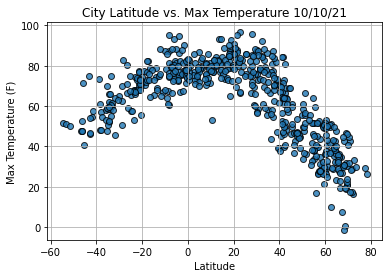

In [28]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

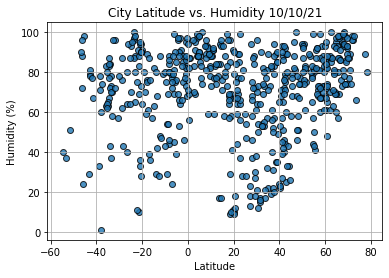

In [29]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

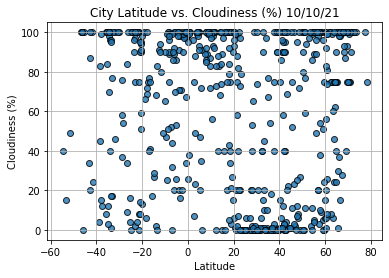

In [30]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

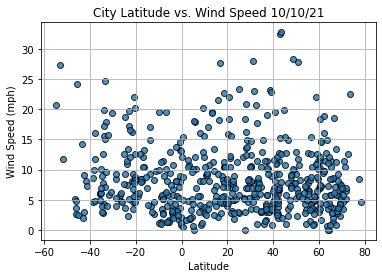

In [31]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [32]:
#import regression
from scipy.stats import linregress

In [35]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [36]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2021-10-10 21:00:32,42.6001,-73.9662,66.63,79,95,6.55
3,Kodiak,US,2021-10-10 21:00:50,57.7900,-152.4072,43.88,60,100,4.85
4,Hilo,US,2021-10-10 21:05:07,19.7297,-155.0900,80.28,91,90,8.05
5,Napasar,IN,2021-10-10 21:05:07,27.9667,73.5500,85.55,37,0,13.65
7,Qaanaaq,GL,2021-10-10 21:05:07,77.4840,-69.3632,29.50,89,100,8.43


In [37]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

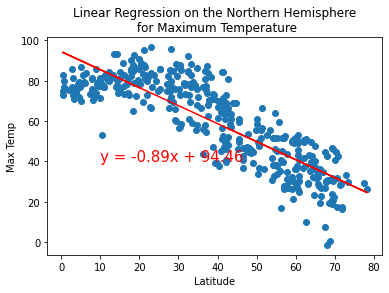

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Maximum Temperature', 'Max Temp',(10,40))

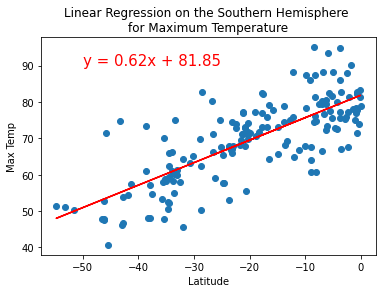

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

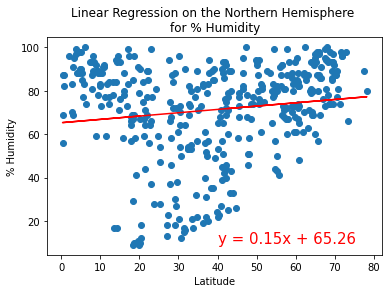

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

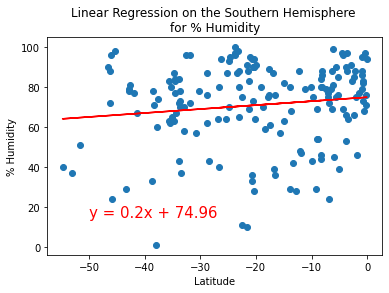

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

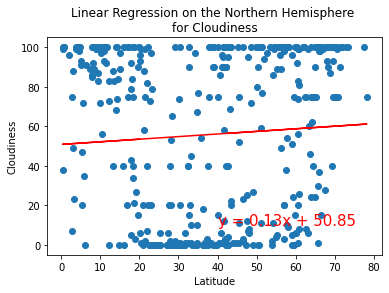

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Cloudiness', 'Cloudiness',(40,10))

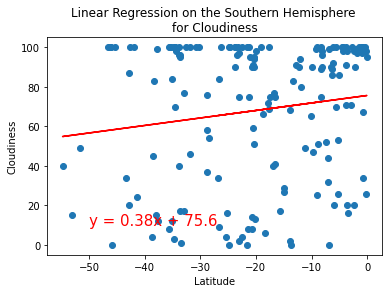

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Cloudiness', 'Cloudiness',(-50,10))

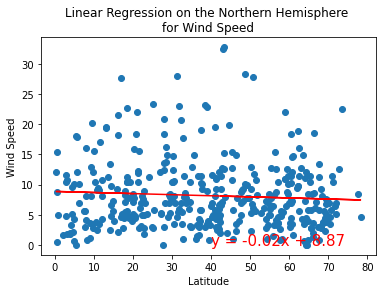

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,0))

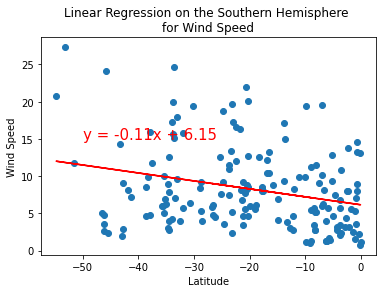

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,15))